<a href="https://colab.research.google.com/github/G0807/retail-sales-analysis/blob/main/Projeto1vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas e lendo o arquivo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df_original = pd.read_excel('/content/Vendas2.xlsx')
display(df_original)


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
100996,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


Criando um Dataframe amostra

In [ ]:
df_amostra = df_original.sample(n=1000)
display(df_amostra)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
70996,49176,2019-09-10,Shopping SP Market,Casaco Liso,2,255,510
16089,11056,2019-02-28,Shopping Midway Mall,Camisa Gola V,1,100,100
67928,47012,2019-08-30,Shopping Ibirapuera,Cueca Xadrez,1,60,60
21399,14744,2019-03-18,Salvador Shopping,Pulseira Linho,1,114,114
43284,29816,2019-06-04,Passei das Águas Shopping,Short Listrado,1,102,102
...,...,...,...,...,...,...,...
7821,5337,2019-01-29,Shopping Iguatemi Fortaleza,Calça Xadrez,1,185,185
47441,32708,2019-06-19,Ribeirão Shopping,Calça Xadrez,1,185,185
2388,1576,2019-01-10,Passei das Águas Shopping,Cinto Listrado,1,214,214
53680,37103,2019-07-11,Norte Shopping,Camisa,1,100,100


Verificando o tipo de dados e alterando aqueles cujo o valor não é ideal para a análise

In [ ]:
df_amostra['Data'] = pd.to_datetime(df_amostra['Data'])
print(df_amostra.dtypes)

Código Venda               int64
Data              datetime64[ns]
ID Loja                   object
Produto                   object
Quantidade                 int64
Valor Unitário             int64
Valor Final                int64
dtype: object


Veficando se há  NaN.

In [ ]:
df_amostra.isnull().sum()

,0
Código Venda,0
Data,0
ID Loja,0
Produto,0
Quantidade,0
Valor Unitário,0
Valor Final,0


Verificando se há linhas repetidas.

In [ ]:
duplicadas = df_amostra.duplicated()
print(duplicadas.sum())

0


 Análise Exploratória de Dados (EDA)
 Abtendo valor total de vendas.

In [ ]:
valor_total = df_amostra['Valor Final'].sum()
print(valor_total)

422545


Total de itens vendidos

In [ ]:
total_itens = df_amostra['Quantidade'].sum()
print(total_itens)

2205


Desempenho por Loja:
 Top 5 lojas com maior valor de vendas.

In [ ]:
top_lojas = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=False).head(5)
display(top_lojas)

,Valor Final
ID Loja,
Shopping Center Leste Aricanduva,34206
Rio Mar Recife,20577
Shopping Center Interlagos,20337
Palladium Shopping Curitiba,19280
Bourbon Shopping SP,18935


 A média de vendas por loja.

In [ ]:
media_lojas = df_amostra[['ID Loja','Quantidade']].groupby('ID Loja').mean().sort_values(by='Quantidade',ascending=False)
display(media_lojas)

,Quantidade
ID Loja,
Shopping Center Interlagos,2.523810
Shopping Center Leste Aricanduva,2.491228
Rio Mar Recife,2.466667
Shopping União de Osasco,2.441176
Iguatemi Esplanada,2.375000
Iguatemi Campinas,2.292683
Novo Shopping Ribeirão Preto,2.275000
Shopping SP Market,2.264706
Ribeirão Shopping,2.250000


 top 5 produtos mais vendidos

In [ ]:
df_amostra[['Produto','Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade',ascending=False).head(5)

,Quantidade
Produto,
Calça Liso,45
Calça,42
Camisa Xadrez,41
Pulseira Estampa,35
Terno Linho,33


" o código abaixo é sujestão do Colab.

In [ ]:
top_produtos = df_amostra.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(5)
display(top_produtos)

,Quantidade
Produto,
Calça Liso,45
Calça,42
Camisa Xadrez,41
Pulseira Estampa,35
Terno Linho,33


Lucro bruto por produdo

In [ ]:
lucro_bruto = df_amostra.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(lucro_bruto)

,Valor Final
Produto,
Terno Linho,24750
Terno Listrado,18434
Terno Xadrez,9926
Terno,9800
Terno Liso,8640
...,...
Short Xadrez,500
Meia Liso,494
Meia Xadrez,492


Análise Temporal

Vendas por mês

In [ ]:
vendas_por_mes = df_amostra.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
display(vendas_por_mes)

,Valor Final
Data,
1,32137
2,29706
3,42977
4,34671
5,37770
6,31717
7,44400
8,33577
9,29339


Vendas Trimestrais

In [ ]:
vendas_trimestrais = df_amostra.groupby(df_amostra['Data'].dt.to_period('Q'))['Valor Final'].sum()
display(vendas_trimestrais)

,Valor Final
Data,
2019Q1,104820
2019Q2,104158
2019Q3,107316
2019Q4,106251


 Meses com maior e menor volume de vendas

In [ ]:
mes_maior_volume = vendas_por_mes.idxmax()
mes_menor_volume = vendas_por_mes.idxmin()
print(f"O mês com maior volume de vendas foi {mes_maior_volume} com um total de R${vendas_por_mes.max():.2f}")
print(f"O mês com menor volume de vendas foi {mes_menor_volume} com um total de R${vendas_por_mes.min():.2f}")

O mês com maior volume de vendas foi 10 com um total de R$48540.00
O mês com menor volume de vendas foi 12 com um total de R$24094.00


Visualização de Dados:

 Vendas totais por loja (top 5).

<ipython-input-56-b5820561e918>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ID Loja', y='Valor Final', data=top_lojas.reset_index(),palette='pastel')


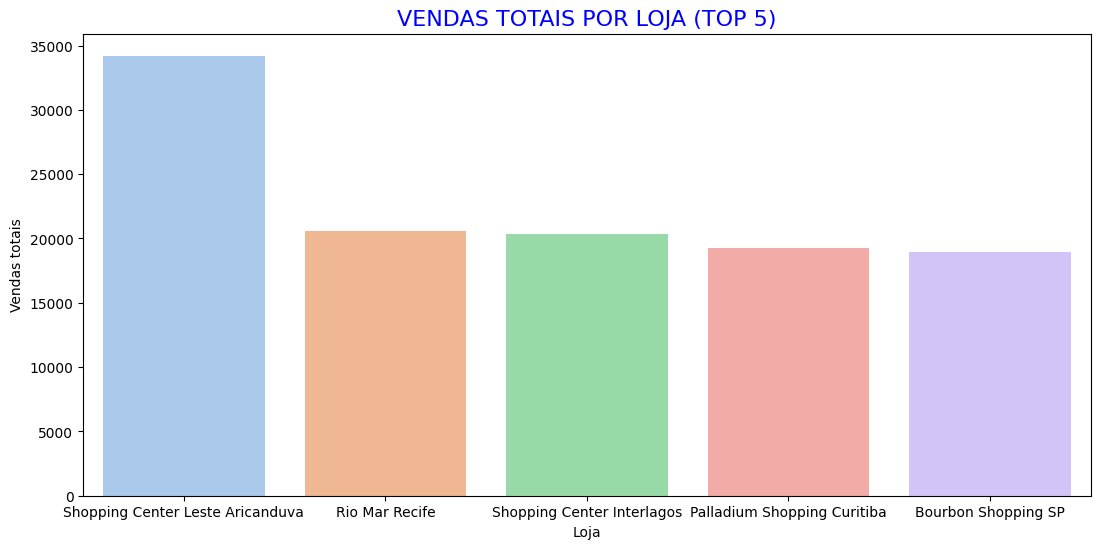

In [ ]:
top_lojas = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=False).head(5)

plt.figure(figsize=(13, 6))
sns.barplot(x='ID Loja', y='Valor Final', data=top_lojas.reset_index(),palette='pastel')
plt.title('VENDAS TOTAIS POR LOJA (TOP 5)', fontsize=16, color='blue', loc='center')
plt.xlabel('Loja')
plt.ylabel('Vendas totais')
plt.show()

Vendas totais por produto (top 5)

<ipython-input-55-aba74e737705>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto',y='Quantidade',data=top_5produtos.reset_index(),palette='viridis')


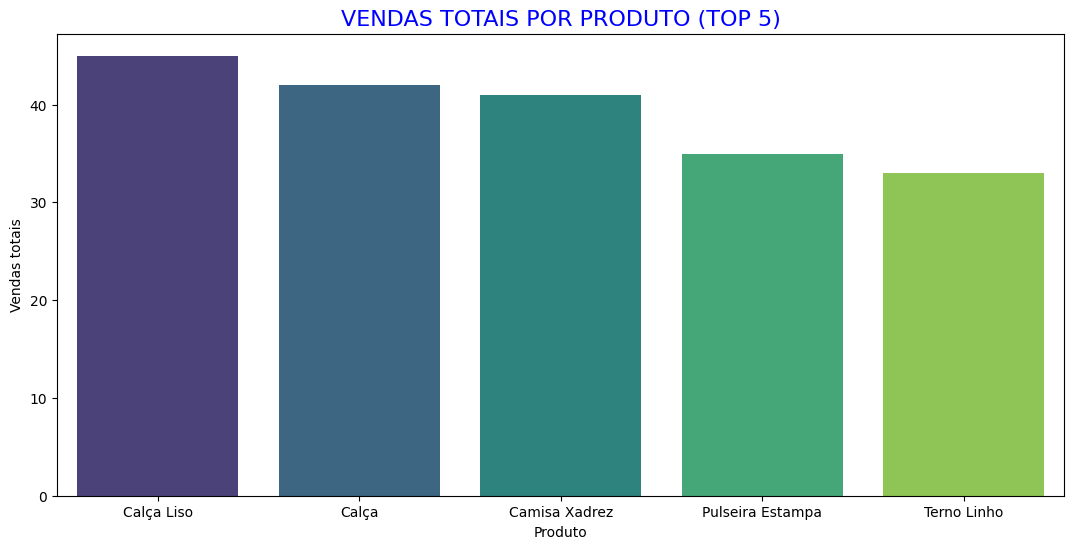

In [ ]:
top_5produtos = df_amostra[['Produto','Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade',ascending=False).head(5)
plt.figure(figsize=(13,6))
sns.barplot(x='Produto',y='Quantidade',data=top_5produtos.reset_index(),palette='viridis')
plt.title('VENDAS TOTAIS POR PRODUTO (TOP 5)', fontsize=16, color='blue', loc='center')
plt.xlabel('Produto')
plt.ylabel('Vendas totais')
plt.show()


Vendas mensais ao longo do ano.

Text(0, 0.5, 'Vendas totais')

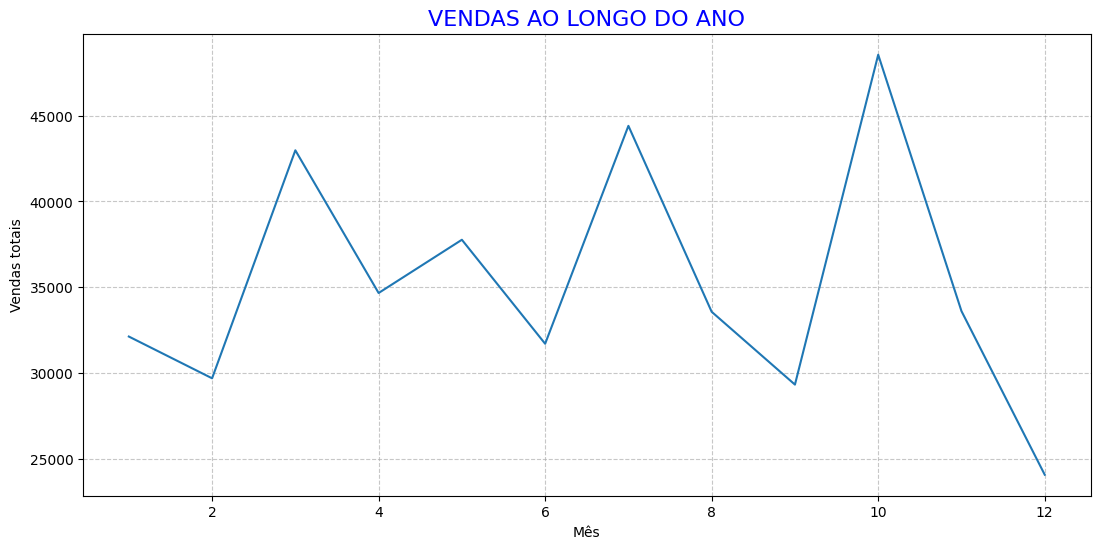

In [ ]:
vendas_por_mes = df_amostra.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
plt.figure(figsize=(13,6))
sns.lineplot(x=vendas_por_mes.index,y=vendas_por_mes.values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('VENDAS AO LONGO DO ANO', fontsize=16, color='blue', loc='center')
plt.xlabel('Mês')
plt.ylabel('Vendas totais')

 A relação entre Quantidade e Valor Final

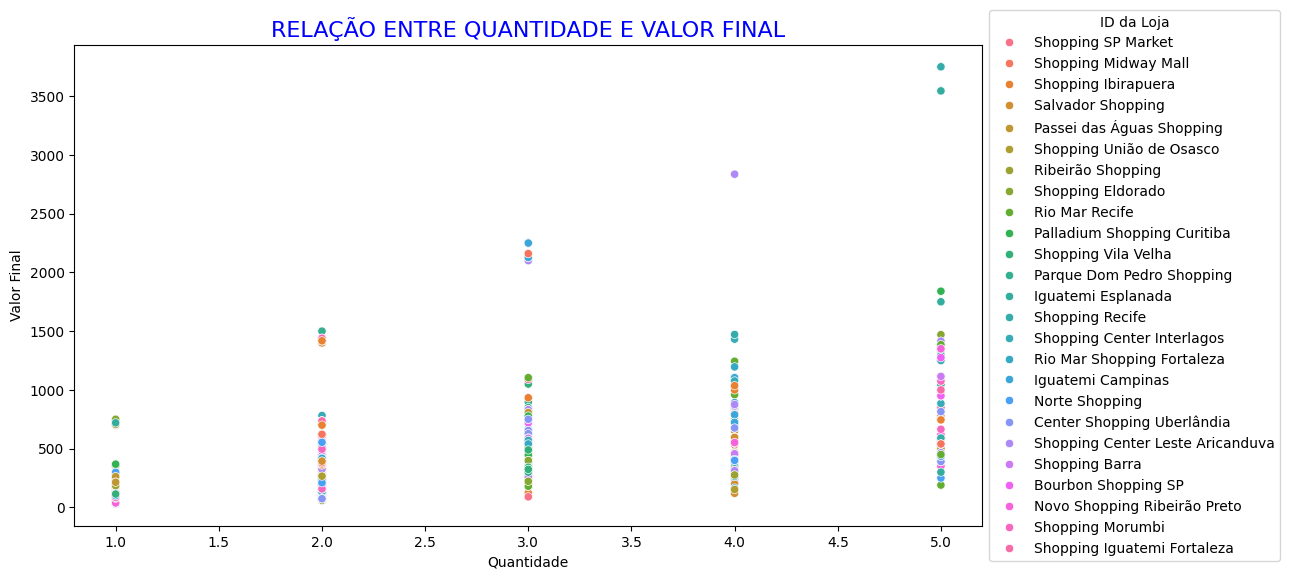

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(13,6))
sns.scatterplot(x='Quantidade',y='Valor Final',data=df_amostra,hue='ID Loja')

plt.title('RELAÇÃO ENTRE QUANTIDADE E VALOR FINAL', fontsize=16, color='blue', loc='center')
plt.xlabel('Quantidade')
plt.ylabel('Valor Final')

# --- Adicionando e Posicionando a Legenda ---
plt.legend(title='ID da Loja', loc='center left', bbox_to_anchor=(1, 0.5))
# title: Título da legenda (opcional, mas bom para clareza)
# loc: Posição "interna" da legenda antes de ancorar. 'center left' é um bom ponto de partida.
# bbox_to_anchor:
#    (1, 0.5) significa:
#    1: Ancorar a legenda à direita da área de plotagem (1.0 é o extremo direito).
#    0.5: Ancorar no meio da altura vertical da área de plotagem (0.5 é o meio).

plt.tight_layout() # Garante que a legenda não seja cortada fora da figura

plt.show()

Informações Extras: Nome das lojas


In [ ]:
display(df_amostra['ID Loja'].unique())

array(['Shopping SP Market', 'Shopping Midway Mall',
       'Shopping Ibirapuera', 'Salvador Shopping',
       'Passei das Águas Shopping', 'Shopping União de Osasco',
       'Ribeirão Shopping', 'Shopping Eldorado', 'Rio Mar Recife',
       'Palladium Shopping Curitiba', 'Shopping Vila Velha',
       'Parque Dom Pedro Shopping', 'Iguatemi Esplanada',
       'Shopping Recife', 'Shopping Center Interlagos',
       'Rio Mar Shopping Fortaleza', 'Iguatemi Campinas',
       'Norte Shopping', 'Center Shopping Uberlândia',
       'Shopping Center Leste Aricanduva', 'Shopping Barra',
       'Bourbon Shopping SP', 'Novo Shopping Ribeirão Preto',
       'Shopping Morumbi', 'Shopping Iguatemi Fortaleza'], dtype=object)

 numero de ocorrencia das lojas

In [ ]:
ocorrencias = df_amostra['ID Loja'].value_counts()
print(ocorrencias)

ID Loja
Shopping Center Leste Aricanduva    57
Palladium Shopping Curitiba         48
Salvador Shopping                   45
Rio Mar Recife                      45
Shopping Ibirapuera                 45
Passei das Águas Shopping           44
Shopping Morumbi                    43
Shopping Recife                     42
Shopping Center Interlagos          42
Shopping Barra                      42
Bourbon Shopping SP                 41
Iguatemi Campinas                   41
Rio Mar Shopping Fortaleza          41
Norte Shopping                      41
Novo Shopping Ribeirão Preto        40
Shopping Eldorado                   38
Shopping Vila Velha                 38
Center Shopping Uberlândia          35
Parque Dom Pedro Shopping           34
Shopping União de Osasco            34
Shopping SP Market                  34
Shopping Iguatemi Fortaleza         34
Shopping Midway Mall                32
Ribeirão Shopping                   32
Iguatemi Esplanada                  32
Name: count, dtyp

Resultado da analise:

Quais foram as lojas com melhor desempenho?

Shopping Center Leste Aricanduva	34206,
Rio Mar Recife	20577,
Shopping Center Interlagos	20337,
Palladium Shopping Curitiba	19280,
Bourbon Shopping SP	18935.

Quais produtos foram os "campeões de vendas"?
Calça Liso	45,
Calça	42,
Camisa Xadrez	41,
Pulseira Estampa	35,
Terno Linho	33,

Houve alguma sazonalidade nas vendas (picos em certos meses, quedas em outros)?

O mês com maior volume de vendas foi outubro com total R$48540.00

 e o mês com o menor volume de vendas foi dezembro com o total de R$ 24094.00.

Quais poderiam ser os próximos passos para otimizar as vendas (por exemplo, focar em marketing para produtos de baixo desempenho ou investir mais nas lojas de melhor desempenho)?

focar no marketing para produtos de baixo desempenho não é vialvel, pela analise chegamos a conclusão que mesmo com um alto fluxo de vendas estes produtos não consiguiram igualar os lucros de produtos mais caros com baixo fluxo de venda. Então o foco é investir nas lojas. Observação as seria bom fazer uma analize personalizada para as lojas de alto desempenho e descubrir os motivos do seu alto desempenho para aplicar nas demais se possivel.
